In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from utils import *
from sklearn import preprocessing

In [2]:
data_patients_original = pd.read_csv('hypertension_patients.gz', compression='gzip')
data_charts_original = pd.read_csv('hypertension_charts.gz', compression='gzip')
# data_patients_original = pd.read_csv('csc2548_ml4h/hypertension_patients.gz', compression='gzip')
# data_charts_original = pd.read_csv('csc2548_ml4h/hypertension_charts.gz', compression='gzip')

In [3]:
# Using for-loop
"""
– Heart rate in bpm (itemid = 220045)
– Respiratory rate in breaths / minute (itemid = 220210) 
– O2 saturation in % (itemid = 220277)
– Blood pressure in mmHg (itemid = 220181)
"""

'\n– Heart rate in bpm (itemid = 220045)\n– Respiratory rate in breaths / minute (itemid = 220210) \n– O2 saturation in % (itemid = 220277)\n– Blood pressure in mmHg (itemid = 220181)\n'

In [6]:
def measurement(itemid, measure_name):
    data_charts = data_charts_original[data_charts_original['itemid'] == itemid]
    
    value_counts = data_charts['hadm_id'].value_counts()
    to_remove = value_counts[value_counts < 2].index
    data_charts = data_charts[~data_charts.hadm_id.isin(to_remove)]
    
    aggregated_data_charts = data_charts.groupby('hadm_id')['valuenum'].agg([pd.np.min, pd.np.max, pd.np.mean])
    merged_data = pd.merge(aggregated_data_charts, data_patients_original, on=['hadm_id'], how='left')
    drop_cols = ['train', 'hadm_id','subject_id', 'hypertension' ] 
    X_train = merged_data[merged_data['train'] == 1]
    X_test = merged_data[merged_data['train'] == 0]
    y_train = X_train['hypertension']
    y_test = X_test['hypertension']
    X_train = X_train.drop(drop_cols, axis=1)
    X_test = X_test.drop(drop_cols, axis=1)
    clf = LogisticRegression(solver = "liblinear", max_iter=500)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    y_predict_prob = clf.predict_proba(X_test)

    # comment on model performance
    print("-------------------Result for ", measure_name, " -------------------")
    print("Score on training set: ", clf.score(X_train,y_train))
    print("Score on testing set: ", clf.score(X_test,y_test))
    print("Accuracy score:",metrics.accuracy_score(y_test, y_predict))
    print("F1 score:",metrics.f1_score(y_test, y_predict))
    print("No. of iterations to converge: ", clf.n_iter_)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label = 1)
    plot_roc(fpr, tpr, "5a_" + measure_name + "_roc_graph.png")
    print("The threshod is: ", thresholds)
    print("AUC score: ", metrics.roc_auc_score(y_test, y_predict_prob[:,1]))

-------------------Result for  heart_rate  -------------------
Score on training set:  0.5624267673480016
Score on testing set:  0.5693999083829593
Accuracy score: 0.5693999083829593
F1 score: 0.0
No. of iterations to converge:  [15]
The threshod is:  [1.48426661 0.48426661 0.4831222  ... 0.38875929 0.38767783 0.38150514]
AUC score:  0.5048149067401563
-------------------Result for  Respiratory  -------------------
Score on training set:  0.5624755700325733
Score on testing set:  0.5689628837635559
Accuracy score: 0.5689628837635559
F1 score: 0.002826855123674912
No. of iterations to converge:  [26]
The threshod is:  [1.5278806  0.5278806  0.51069886 ... 0.39543718 0.39340546 0.37041042]
AUC score:  0.52724245347826
-------------------Result for  O2  -------------------
Score on training set:  0.5623492601525324
Score on testing set:  0.5697034546010394
Accuracy score: 0.5697034546010394
F1 score: 0.0
No. of iterations to converge:  [11]
The threshod is:  [1.45623589 0.45623589 0.44732

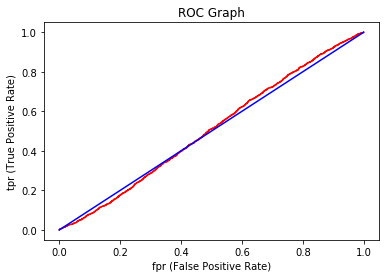

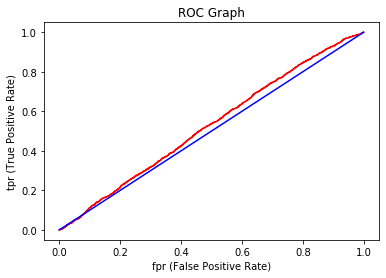

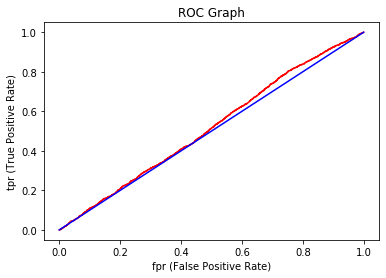

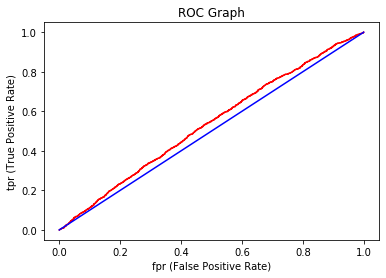

In [7]:
measurement(220045, "heart_rate")
measurement(220210, "Respiratory")
measurement(220277, "O2")
measurement(220181, "blood_pressure")